# Introduction

## Milestones 1

Nama    : Shinta Amalia

Batch   : RMT-034

Secara objective program ini dibuat untuk menganalisis data dengan melakukan `data preparation` beserta `data cleaning` jika diperlukan yang selanjutnya akan diolah secara `statistik` sesuai dengan problem pada `business knowedlege` agar menghasilkan informasi yang dibutuhkan. 

## URL 

Dashboard 
https://public.tableau.com/views/P0M1_shinta/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Kaggle
https://www.kaggle.com/datasets/rishikumarrajvansh/insurance-claims-data

# Problem Indentification

## Case Study - Claim Insurance

Saya merupakan data analyst di salah satu perusahaan asuransi yang berada di US. Dalam waktu 2 tahun yaitu 2017 s/d 2018 saya telah memperhatikan jumlah klaim asuransi yang dilakukan oleh pelanggan atau customer. Tujuan saya ingin memahami faktor-faktor yang mempengaruhi jumlah klaim tersebut sehingga dapat membantu perusahaan untuk menentukan strategi yang optimal yang akan meningkatkan profit.

## Business Understanding

### Business Matrix 

Business matrix pada kasus ini yaitu jumlah klaim asuransi (claim_amount)

### Mengindentifikasikan Problem Statements:

Dengan SMART framework:
1. Spesific: Mengidentifikasi faktor-faktor yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018 sebagai bahan evaluasi yang akan digunakan untuk strategi perusahaan pada quartal berikutnya. 
2. Measurable: Menganalisis faktor-faktor utama yang berkontribusi terhadap jumlah klaim asuransi sehingga terdapat peningkatan pelanggan asuransi dengan strategi yang lebih tepat sasaran sebesar 15% dari quartal sebelumnya.
3. Achievable: Menggunakan teknik analisis data yang tepat yaitu statistik deksriptif dan inferensial untuk mengidentifikasi variabel-variabel utama yang mempengaruhi klaim asuransi.
4. Relevant: Memahami faktor-faktor tersebut akan memberikan wawasan penting kepada perusahaan untuk menentukan strategi perusahaan yang optimal sehingga akan meningkatkan profit.
5. Time-bound: Hasil identifikasi faktor-faktor yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018 akan menjadi bahan rekomendasi untuk quartal selanjutnya. 

Problem Statement:

Untuk mengidentifkasi faktor-faktor yang mempengaruhi jumlah klaim asuransi yang dilakukan oleh pelanggan selama periode 2017-2018 guna menentukan strategi perusahaan yang optimal sehingga akan terjadi peningkatan sebesar 15% dalam penjualannya dan tentunya meningkatkan profit perusahaan akan dicapai dengan melakukan teknik analisis data yang tepat yaitu statistik deksriptif dan inferensial untuk mengidentifikasi variabel-variabel utama yang mempengaruhi klaim asuransi. 

### Penjabaran Masalah

Masalah utama: Mengidentifikasi faktor-faktor yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018 sehingga terdapat peningkatan penawaran asuransi dengan strategi yang lebih tepat sasaran.

#### 5W+1H 
1. Berapa nilai minimum, maximum, rata-rata, median, modus dari jumlah klaim yang diajukan?
2. Pada bulan apa rata-rata klaim asuransi tertinggi dan terendah?
3. Apa saja variabel-variabel yang yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018? 
4. Berdasarkan kriteria berikut dibawah ini, siapa saja yang paling banyak melakukan klaim asuransi di dalam kelompoknya?
   - Jenis kelamin dan kategori umur 
   - Kota
   - Wilayah 
   - Ada atau tidaknya tindakan kecurangan
5. Bagaimana perbedaan jumlah klaim asuransi pada tipe pelanggan dilihat dari jenis kelaminnya?






# Libraries 1

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\1905803957.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Libraries berhasil di import

# Data Loading

In [3]:
# Memanggil file csv 
claim_insurance = pd.read_csv('claims.csv')
cust_data = pd.read_csv('cust.csv')

In [4]:
# Mengatur Format Display menjadi HTML
display(HTML('<center><b><h3>Claim Insurance</h3></b></center><br>'))
display(claim_insurance)
print('\n')
display(HTML('<center><b><h3>Cust Demographics</h3></b></center><br>'))
display(cust_data)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,33985796,75740424,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No
2,53522022,30308357,Other driver error,2/2/2018,Auto,No,Material only,"$3,369.50",1.0,Yes
3,13015401,47830476,Natural causes,6/17/2018,Auto,No,Material only,"$1,680",1.0,No
4,22890252,19269962,Crime,1/13/2018,Auto,No,Material only,"$2,680",1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,6/11/2017,Auto,No,Material only,"$3,059",4.0,Yes
1096,10247193,14818669,Natural causes,3/14/2018,Auto,No,Material only,"$1,520",2.0,No
1097,79807493,85322831,Other driver error,2/9/2018,Auto,No,Material and injury,"$23,575",2.0,Yes
1098,69299345,73449366,Other causes,3/21/2018,Auto,Unknown,Material and injury,"$25,120",1.0,No


,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,1/12/1979,VT,789-916-8172,Platinum
1,75740424,Female,1/13/1970,ME,265-543-1264,Silver
2,30308357,Female,3/11/1984,TN,798-631-4758,Silver
3,47830476,Female,5/1/1986,MA,413-187-7945,Silver
4,19269962,Male,5/13/1977,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,3/15/1981,ND,459-425-4319,Platinum
1081,42364152,Female,7/7/1996,ID,529-462-1635,Silver
1082,19888166,Male,4/11/1990,WI,712-651-9613,Gold
1083,11256802,Female,10/22/1964,LA,469-345-5617,Silver


Perubahan csv menjadi HTML berhasil dijalankan.

Penjelasan dari masing-masing tabel yaitu: 
1. Tabel `Claim Insurance` merupakan cacatan klaim asuransi yang dimiliki oleh perusahaan pada tau 2017-2018. Tabel tersebut terdiri dari 10 kolom yang masing-masingnya terdiri dari 1100 baris. Berikut penjelasan masing-masing kolom:
   - claim_id = nomor indentifikasi unik dari claim yang diajukan (data tidak boleh ada yang sama) dan berperan sebagai primary key
   - customer_id = nomor kepemilikan asuransi yang dimiliki per-individu dan 
   - incident_cause = penyebab kecelakaan 
   - claim_date = tanggal klaim diajukan
   - claim_area = apakah masuk kedalam kategori kendaraan bermotor atau berhubungan dengan properti tempat tinggal
   - police_report = apakah kejadian kecelakaan dilaporkan ke polisi atau tidak 
   - claim_type = tipe klaim yang diajukan 
   - claim_amount = besarnya klaim yang diajukan 
   - total_policy_claims = banyaknya klaim polis yang diajukan
   - fraudulent = apakah teridentifikasi adanya kecurangan atau kepalsuan data 
2. Tabel `Cust Demographics` merupakan data pelanggan asuransi. Tabel tersebur terdiri dari 6 kolom yang masing-masingnya terdiri dari 1085 baris. Berikut penjelasan masing-masing kolom:
   - CUST_ID = nomor kepemilikan asuransi yang dimiliki per-individu dan berperan sebagai primary key 
   - gender = jenis kelamin pemilik asuransi 
   - DateOfBirth = tanggal lahir pemilik asuransi 
   - State = negara tempat tiggal pemilik asuransi 
   - Contact = nomor telefon pemilik asuransi 
   - Segment = jenis asuransi yang dipilih 

Dari penjelasan tersebut, terdapat beberapa poin yaitu: 
- Diketahui bahwa kedua tabel tersebut terdapat satu kolom yang bisa dihubungkan yaitu customer_id dan cust_id. Pada tabel claim_insurance, claim_id berperan sebagai primary key sedangkan pada tabel cust demographics, cust_id berperan sebagai primary key yang mana akan berperan sekaligus bisa menjadi foreign key. Sesuai dengan tujuan analisa yang mana untuk perencanaan strategi perusahaan, maka penggabungan kedua data tersebut akan dilakukan.
- Dengan baris yang berbeda yaitu 1100 dan 1085 baris (selisih 15 baris) maka terdapat beberapa kemungkinan yaitu customer melakukan klaim lebih dari satu kali atau terdapat customer id yang datanya belum ada dalam tabel cust demographic. Oleh sebab itu, diperlukan analisa lebih lanjut.


# Data Preparation

Data preparation dilakukan untuk mengecek data agar selanjutnya bisa dianalisa. Pada kasus ini, pengecekan tersebut yaitu:
1. Data exploriation atau eksplorasi data yang digunakan untuk pembuatan data frame, menggabungkan dua tabel, cek missing value dan tipe datanya. 
2. Data cleaning atau pembersihan data yang digunakan untuk mengatasi jika adanya missing value dan ketidaksesuain tipe data. 

## Data Exploriation

In [5]:
# Menyimpan variabel kedalam dataframe 
claim_df = pd.DataFrame(claim_insurance)
cust_df = pd.DataFrame(cust_data)

Karena terdapat dua file csv, maka masing-masing disimpan dalam data frame yang berbeda yaitu `claim_df` dan `cust_df`

Karena tujuan analisa yaitu untuk mengetahui perencanaan strategi perusahaan dalam hal penjualan maka selanjutnya penggabungan data dilakukan dengan concat sehingga kedua tabel dapat disesuaikan berdasarkan kecocokan customer_id dengan CUST_id.

In [6]:
# Mereset index sebelu dilakukan penggabungan dengan concat 
claim_df.reset_index(inplace=True)
cust_df.reset_index(inplace=True)

# Menggabungkan dua dataframe
df = pd.concat([claim_df, cust_df], axis=1)

In [7]:
df

,index,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,index,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No,0.0,21868593.0,Female,1/12/1979,VT,789-916-8172,Platinum
1,1,33985796,75740424,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No,1.0,75740424.0,Female,1/13/1970,ME,265-543-1264,Silver
2,2,53522022,30308357,Other driver error,2/2/2018,Auto,No,Material only,"$3,369.50",1.0,Yes,2.0,30308357.0,Female,3/11/1984,TN,798-631-4758,Silver
3,3,13015401,47830476,Natural causes,6/17/2018,Auto,No,Material only,"$1,680",1.0,No,3.0,47830476.0,Female,5/1/1986,MA,413-187-7945,Silver
4,4,22890252,19269962,Crime,1/13/2018,Auto,No,Material only,"$2,680",1.0,No,4.0,19269962.0,Male,5/13/1977,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,97727122,35951012,Other driver error,6/11/2017,Auto,No,Material only,"$3,059",4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,1096,10247193,14818669,Natural causes,3/14/2018,Auto,No,Material only,"$1,520",2.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,1097,79807493,85322831,Other driver error,2/9/2018,Auto,No,Material and injury,"$23,575",2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098,1098,69299345,73449366,Other causes,3/21/2018,Auto,Unknown,Material and injury,"$25,120",1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Penggabungan data berhasil dilakukan dalam variabel `df` sehingga data terdiri dari 18 kolom dan 1100 baris. Namun, terdapat beberapa catatan yaitu:
- Terdapat dua kolom  `index` yang mengganggu dan tidak akan digunakan. 
- Terdapat dua kolom dengan nilai sama yaitu `customer_id` dan `cust_id` sehingga satu kolom saja harusnya sudah mewakili.
- Dapat dilihat bahwa terdapat data `customer_id` yang tidak cocok dengan `cust_id` sehingga diperoleh NaN pada kolom cust_id, gender, dateofbirth, state, concact, dan segmen. 

Maka sesuai poin 1 dan 2, akan dilakukan penghapusan kedua kolom index dan cust_id

In [8]:
# drop cust_id dan index

df = df.drop('CUST_ID', axis=1)
df = df.drop('index', axis=1)
df.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment'],
      dtype='object')

kolom `index` dan `cust_id` berhasil dihapus.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

Dilakukan pengecekan informasi data. Dalam pengecekan tersebut terdapat beberapa catatan yaitu yaitu:
- Kolom yang semula berjumlah 18 kini menjadi 15 kolom. 
- Terdapat ketidakseragaman data jika dilihat pada non-null count sehingga kemungkinan terdapat nilai null atau missing value yang perlu dicek pada setiap kolomnya. 
- Berdasarkan tipe data terdapat 1 data float, 2 data integer, dan 12 object namun terdapat kekeliruan yaitu:
  - `claim_date` dan `DateOfBirth` seharusnya datetimes bukan object.
  - `claim_amount` seharusnya float bukan object. 
  - `total_policy_claims` seharusnya int bukan float.

  Sehingga diperlukan cleaning untuk 3 kolom tersebut.



In [10]:
#  CEK MISSING VALUE

df.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
dtype: int64

Telah dilakukan pengecekan missing value pada masing-masing kolom. Dapat dilihat bahwa:
- Pada kolom `claim_amount` terdapat 65 missing value.
- Pada kolom `total_policy_report` terdapat 10 missing value.
- Pada kolom `gender`, `DateOfBirth`, `State`, `Contact`, `Segment` terdapat 15 missing value.

Dari ketiga poin tersebut akan dilakukan analisa missing value yang terjadi pada tahap data cleaning.

## Data Cleaning

### Irregular Data Cleaning in `claim_amount`

Cleaning dimaksud untuk penghapusan $ dan , pada kolom `claim_amount` dikarenakan akibat kedua simbol tersebut data terbaca menjadi object sehingga perlu diganti menjadi float.

In [11]:
# Mengecek tipe data
df.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

Dapat dilihat bahwa claim_amouont merupakan object sehingga harus diganti ke float

In [12]:
# Menghapus $ dan , dalam kolom claim_amount
df['claim_amount'] = df['claim_amount'].str.replace('$', '')
df['claim_amount'] = df['claim_amount'].str.replace(',', '')


df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980,1.0,No,Female,1/12/1979,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/3/2018,Home,Unknown,Material only,2980,3.0,No,Female,1/13/1970,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2/2/2018,Auto,No,Material only,3369.50,1.0,Yes,Female,3/11/1984,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,6/17/2018,Auto,No,Material only,1680,1.0,No,Female,5/1/1986,MA,413-187-7945,Silver
4,22890252,19269962,Crime,1/13/2018,Auto,No,Material only,2680,1.0,No,Male,5/13/1977,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,6/11/2017,Auto,No,Material only,3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,3/14/2018,Auto,No,Material only,1520,2.0,No,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,2/9/2018,Auto,No,Material and injury,23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,3/21/2018,Auto,Unknown,Material and injury,25120,1.0,No,NaN,NaN,NaN,NaN,NaN


$ dan , pada kolom `claim_amount` berhasil dihapus sehingga nantinya tipe data bisa diubah ke float.

### Missing Values Handling

Missing value handling pada kasus ini dapat dibagi menjadi tiga yaitu:
1. Pada kolom `claim_amount` 
2. Pada kolom `total_policy_report`
3. Pada kolom `gender`, `DateOfBirth`, `State`, `Contact`, `Segment` 
Pembagian tersebut didasari dengan hubungannya dengan customer id dengan penjelasannya pada masing-masing sub-bab.

In [13]:
# Mengecek value count pada masing-masing kolom
columns_object = ['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment']

for i in columns_object:
    print(df[i].value_counts())
    print('--'*30)

claim_id
58809728    1
54004764    1
33985796    1
53522022    1
13015401    1
           ..
12548447    1
35489765    1
67257404    1
53780662    1
72738047    1
Name: count, Length: 1100, dtype: int64
------------------------------------------------------------
customer_id
30308357    2
47830476    2
19269962    2
84147585    2
85357756    2
           ..
46850495    1
79539873    1
42364152    1
19888166    1
75740424    1
Name: count, Length: 1093, dtype: int64
------------------------------------------------------------
incident_cause
Other causes          290
Driver error          262
Other driver error    249
Natural causes        189
Crime                 110
Name: count, dtype: int64
------------------------------------------------------------
claim_date
4/4/2018      18
10/17/2017    17
7/7/2018      17
1/13/2018     17
10/31/2017    16
              ..
1/26/2018      6
8/18/2017      6
6/10/2018      6
8/4/2017       6
8/23/2018      5
Name: count, Length: 100, dtype: int64


Dapat dilihat bahwa ternyata pelanggan bisa melakukan klaim asuransi lebih dari 1 kali dan value yang missing tidak terdekteksi disini.

#### Kolom `gender`, `DateOfBirth`, `State`, `Contact`, `Segment` 

In [14]:
# Memisahkan missing value pada keempat kolom dan disimpan pada masing-masing variabel 
gender_mv = df[df.gender.isna()]
Dateofbirth_mv = df[df.DateOfBirth.isna()]
State_mv = df[df.State.isna()]
Contact_mv = df[df.Contact.isna()]
Segment_mv = df[df.Segment.isna()]

In [15]:
# Mengecek kembali jumlah missing value 
gender_mv.isna().sum()
Dateofbirth_mv.isna().sum()
State_mv.isna().sum()
Contact_mv.isna().sum()
Segment_mv.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
dtype: int64

In [16]:
# Mengetahui Panjang Data Missing Value 
len(gender_mv)
len(Dateofbirth_mv)
len(State_mv)
len(Contact_mv)
len(Segment_mv)

15

Dari kedua pengecekan tersebut terbukti missing value pada keempat kolom tersebut berjumlah 15.

In [17]:
gender_mv

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
1085,5829074,2379897,Other causes,7/20/2018,Auto,No,Material only,2080,1.0,No,NaN,NaN,NaN,NaN,NaN
1086,12632133,49290530,Natural causes,10/30/2018,Auto,No,Material only,2875,1.0,Yes,NaN,NaN,NaN,NaN,NaN
1087,45052103,55466148,Driver error,12/3/2017,Auto,No,Injury only,29010,1.0,No,NaN,NaN,NaN,NaN,NaN
1088,87003624,99120304,Other causes,3/22/2017,Auto,No,Material only,1710,1.0,No,NaN,NaN,NaN,NaN,NaN
1089,1680169,65061027,Natural causes,5/2/2017,Auto,Unknown,Material only,1030,4.0,No,NaN,NaN,NaN,NaN,NaN
1090,56626640,82584690,Other driver error,8/24/2017,Auto,Unknown,Material only,2288.50,1.0,Yes,NaN,NaN,NaN,NaN,NaN
1091,7280558,40349009,Crime,10/17/2017,Auto,No,Material only,3346.50,3.0,Yes,NaN,NaN,NaN,NaN,NaN
1092,74995596,55765343,Crime,6/30/2018,Auto,Unknown,Material only,1805.50,1.0,Yes,NaN,NaN,NaN,NaN,NaN
1093,8475725,75409818,Other causes,7/7/2018,Auto,No,Material only,1610,3.0,No,NaN,NaN,NaN,NaN,NaN
1094,33194240,18332683,Other causes,11/13/2017,Auto,Yes,Material and injury,24850,1.0,No,NaN,NaN,NaN,NaN,NaN


Dalam tabel tersebut dapat dilihat bahwa kelimabelas data tersebut pada masing-masing kolom berada di baris yang sama, sehingga:

Missing value untuk keempat kolom tersebut tergolong MCAR (Missing Completely At Random) dikarenakan hilangnya data tersebut sepenuhnya acak dan tidak bergantung pada nilai variabel lain maupun nilai dari variabel itu sendiri. Semua pengisian tersebut dilakukan oleh pelanggan dengan data mereka sendiri sehingga tidak bergantung pada data lain. 

Karena tergolong MCAR dan terjadi dalam satu runtutan kolom dan baris yang sama, maka dilakukan missing values handling dengan cara penghapusan data yang kosong pada kolom tersebut.

In [18]:
# Menghapus missing value pada data dalam kolom
df_cleaned = df.dropna(subset=['gender', 'DateOfBirth', 'State', 'Contact', 'Segment'])

In [19]:
# Cek Data 
df_cleaned

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980,1.0,No,Female,1/12/1979,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/3/2018,Home,Unknown,Material only,2980,3.0,No,Female,1/13/1970,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2/2/2018,Auto,No,Material only,3369.50,1.0,Yes,Female,3/11/1984,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,6/17/2018,Auto,No,Material only,1680,1.0,No,Female,5/1/1986,MA,413-187-7945,Silver
4,22890252,19269962,Crime,1/13/2018,Auto,No,Material only,2680,1.0,No,Male,5/13/1977,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,9/6/2018,Auto,Yes,Material only,1770,1.0,No,Female,3/15/1981,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,5/9/2017,Home,No,Material only,2800,1.0,No,Female,7/7/1996,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,5/15/2017,Auto,Yes,Injury only,33080,2.0,No,Male,4/11/1990,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,4/18/2017,Auto,No,Material only,2840,4.0,No,Female,10/22/1964,LA,469-345-5617,Silver


Setelah dilakukan penghapusan data, dapat dilihat bahwa baris yang semula 1100 menjadi 1085 baris karena dikurang 15 missing value. Jumlah baris tersebut sama dengan jumlah baris cust demography yang mana memiliki kolom cust_id yang berbeda-beda, namun dilihat dari value count pada customer id ternyata terdapat pelanggan yang klaim lebih dari 1 kali. Artinya, terdapat dalam data cust demography ada yang tidak melakukan klaim asuransi pada periode 2017-2018.

#### Missing Value pada kolom `claim_amount` 

In [20]:
# Memisahkan missing value pada kolom claim_amount dan disimpan dalam variabel claim_amount_mv
claim_amount_mv = df_cleaned[df_cleaned.claim_amount.isna()]

In [21]:
# Mengecek kembali jumlah missing value 
claim_amount_mv.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims     1
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [22]:
len(claim_amount_mv)

65

Dari kedua pengecekan tersebut terbukti missing value pada kolom `claim_amount` berjumlah 65.

Missing value untuk `claim_amount` tersebut tergolong MCAR (Missing Completely At Random) dikarenakan hilangnya data tersebut sepenuhnya acak dan tidak bergantung pada nilai variabel lain maupun nilai dari variabel itu sendiri. Semua pengisian dilakukan oleh piha asuransi yang berarti bisa teridentifikasi akibat human error.

Karena tergolong MCAR dan merupakan data numerik, maka dilakukan missing values handling dengan mean sehingga tidak akan memperkenalkan bias yang signifikan.

In [23]:
# Mengubah claim_amount menjadi numeric
df_cleaned['claim_amount'] = pd.to_numeric(df_cleaned['claim_amount'], errors='coerce')

# Mengisi missing value dengan nilai rata-rata 
df_cleaned['claim_amount'].fillna(df_cleaned['claim_amount'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3280137864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['claim_amount'] = pd.to_numeric(df_cleaned['claim_amount'], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3280137864.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace 

In [24]:
# Mengecek missing value 
df_cleaned.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

Missing value pada kolom `claim_amount` berhasil ditangani sehingga kini berjumlah 0.

#### Missing Value pada kolom `total_policy_claims` 

In [25]:
# Memisahkan missing value pada kolom total_policy_claims dan disimpan dalam variabel total_policy_claims_mv
total_policy_claims_mv = df_cleaned[df_cleaned.total_policy_claims.isna()]

In [26]:
# Mengecek kembali jumlah missing value 
total_policy_claims_mv.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [27]:
len(total_policy_claims_mv)

10

Dari kedua pengecekan tersebut terbukti missing value pada kolom `total_policy_claims` berjumlah 10.

Missing value untuk `total_policy_claims` tersebut tergolong MCAR (Missing Completely At Random) dikarenakan hilangnya data tersebut sepenuhnya acak dan tidak bergantung pada nilai variabel lain maupun nilai dari variabel itu sendiri. Semua pengisian dilakukan oleh piha asuransi yang berarti bisa teridentifikasi akibat human error.

Karena tergolong MCAR dan merupakan data numerik, maka dilakukan missing values handling dengan mean sehingga tidak akan memperkenalkan bias yang signifikan.

In [28]:
# Mengisi missing value dengan nilai rata-rata 
df_cleaned['total_policy_claims'].fillna(df_cleaned['total_policy_claims'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\2493914129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['total_policy_claims'].fillna(df_cleaned['total_policy_claims'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\2493914129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_po

In [29]:
# Mengecek missing value 
df_cleaned.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

Missing value pada kolom `total_policy_claims` berhasil ditangani sehingga kini berjumlah 0.

### Data Types Handling

Cleaning ini dimaksud untuk mengubah tipe data pada `claim_date` dan `DateOfBirth` menjadi datetimes dan `total_policy_claims` menjadi integer.

In [30]:
df_cleaned.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [31]:
# Perubahan Tipe Data 
df_cleaned['claim_date'] = pd.to_datetime(df_cleaned['claim_date'])
df_cleaned['total_policy_claims'] = df_cleaned['total_policy_claims'].astype(int)
df_cleaned['DateOfBirth'] = pd.to_datetime(df_cleaned['DateOfBirth'])

# Cek Hasilnya 
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1085 non-null   float64       
 8   total_policy_claims  1085 non-null   int64         
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-null   o

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3905901197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['claim_date'] = pd.to_datetime(df_cleaned['claim_date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3905901197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_policy_claims'] = df_cleaned['total_policy_claims'].astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3905901197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Tipe data kini sudah sesuai dan bisa dilakukan analisis berikutnya. 

#### Column `State` Handling 

Handling yang dimaksud untuk tidak menjadikan state dalam bentuk inisial. 

In [32]:
# Mengetahui daftar unique value 
uv_State = df_cleaned['State'].unique()
print(f"Daftar unique value untuk state yaitu: {uv_State}")

# Mengetahui banyaknya unique value 
uvn_State = df_cleaned['State'].nunique()
print(f"Jumlah unique value untuk state yaitu: {uvn_State}")


Daftar unique value untuk state yaitu: ['VT' 'ME' 'TN' 'MA' 'NV' 'NH' 'AR' 'AK' 'ID' 'RI' 'KY' 'MD' 'MI' 'IL'
 'WA' 'SC' 'OK' 'KS' 'CT' 'IN' 'UT' 'AZ' 'IA' 'NM' 'WI' 'WY' 'NY' 'LA'
 'DE' 'GA' 'OH' 'SD' 'WV' 'NJ' 'TX' 'CA' 'NC' 'MT' 'VA' 'OR' 'AL' 'HI'
 'ND' 'MN' 'MO' 'CO' 'FL' 'NE' 'MS' 'PA']
Jumlah unique value untuk state yaitu: 50


Pada kolom `state` terdapat 50 unique value yaitu
  - VT = Vermont
  - ME = Maine
  - TN = Tennessee
  - MA = Massachusetts
  - NV = Nevada
  - NH = New Hampshire
  - AR = Arkansas
  - AK = Alaska
  - ID = Idaho
  - RI = Rhode Island
  - KY = Kentucky
  - MD = Maryland
  - MI = Michigan
  - IL = Illinois
  - WA = Washington
  - SC = South Carolina
  - OK = Oklahoma
  - KS = Kansas
  - CT = Connecticut
  - IN = Indiana
  - UT = Utah
  - AZ = Arizona
  - IA = Iowa
  - NM = New Mexico
  - WI = Wisconsin
  - WY = Wyoming
  - NY = New York
  - LA = Louisiana
  - DE = Delaware
  - GA = Georgia
  - OH = Ohio
  - SD = South Dakota
  - WV = West Virginia
  - NJ = New Jersey
  - TX = Texas
  - CA = California
  - NC = North Carolina
  - MT = Montana
  - VA = Virginia
  - OR = Oregon
  - AL = Alabama
  - HI = Hawaii
  - ND = North Dakota
  - MN = Minnesota
  - MO = Missouri
  - CO = Colorado
  - FL = Florida
  - NE = Nebraska
  - MS = Mississippi
  - PA = Pennsylvania. 

In [33]:
# Mengubah kolom state berdasarkan state_map 
state_map = {
    'VT': 'Vermont', 'ME': 'Maine', 'TN': 'Tennessee', 'MA': 'Massachusetts',
    'NV': 'Nevada', 'NH': 'New Hampshire', 'AR': 'Arkansas', 'AK': 'Alaska',
    'ID': 'Idaho', 'RI': 'Rhode Island', 'KY': 'Kentucky', 'MD': 'Maryland',
    'MI': 'Michigan', 'IL': 'Illinois', 'WA': 'Washington', 'SC': 'South Carolina',
    'OK': 'Oklahoma', 'KS': 'Kansas', 'CT': 'Connecticut', 'IN': 'Indiana',
    'UT': 'Utah', 'AZ': 'Arizona', 'IA': 'Iowa', 'NM': 'New Mexico', 'WI': 'Wisconsin',
    'WY': 'Wyoming', 'NY': 'New York', 'LA': 'Louisiana', 'DE': 'Delaware', 'GA': 'Georgia',
    'OH': 'Ohio', 'SD': 'South Dakota', 'WV': 'West Virginia', 'NJ': 'New Jersey',
    'TX': 'Texas', 'CA': 'California', 'NC': 'North Carolina', 'MT': 'Montana',
    'VA': 'Virginia', 'OR': 'Oregon', 'AL': 'Alabama', 'HI': 'Hawaii', 'ND': 'North Dakota',
    'MN': 'Minnesota', 'MO': 'Missouri', 'CO': 'Colorado', 'FL': 'Florida', 'NE': 'Nebraska',
    'MS': 'Mississippi', 'PA': 'Pennsylvania'
}

df_cleaned['State'] = df_cleaned['State'].map(state_map)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\4038516229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['State'] = df_cleaned['State'].map(state_map)


In [34]:
# Mengecek hasil 
df_cleaned.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,Vermont,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,Maine,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,Tennessee,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,Massachusetts,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,Nevada,956-871-8691,Gold
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,New Hampshire,419-712-8513,Gold
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4,No,Male,1999-03-02,Arkansas,752-398-2914,Gold
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3,No,Male,1999-10-25,Alaska,256-968-9172,Silver
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1,No,Male,1993-10-12,Idaho,142-324-7481,Silver
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2,Yes,Female,1966-09-09,Rhode Island,165-519-4583,Gold


Data pada kolom `State` berhasil diubah

### Adding New Column

Kolom yang akan ditambah yaitu kolom umur (Age) mengacu pada kolom DateOfBirth, kolom kategori umur (AgeCategory) berdasarkan kolom Age, dan kolom wilayah (Area) mengacu pada kolom State. Penambahan ketiga kolom ini merupakan kebutuhan analisa untuk memperoleh strategi yang lebih spesifik. 

#### DateofBirth for Age

In [35]:
# Perhiunga umur berdasarkan kolom dateofbirth
def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [36]:
# Memasukkan hasil perhitungn ke dalam df_cleaned dengan tabel baru bejudul 'Age'
df_cleaned['Age'] = df_cleaned['DateOfBirth'].apply(calculate_age)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3145867406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['DateOfBirth'].apply(calculate_age)


In [37]:
df_cleaned.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,Vermont,789-916-8172,Platinum,45
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,Maine,265-543-1264,Silver,54
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,Tennessee,798-631-4758,Silver,40
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,Massachusetts,413-187-7945,Silver,38
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,Nevada,956-871-8691,Gold,47


In [38]:
df_cleaned.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims             int64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
Age                             int64
dtype: object

Kolom age berhasil ditambahkan dengan tipe data yang sudah sesuai yaitu integer.

#### Age for AgeCategory

In [39]:
# Mengetahui daftar unique value 
uv_age = df_cleaned['Age'].unique()
print(f"Daftar unique value untuk Age yaitu: {uv_age}")

# Mengetahui banyaknya unique value 
uvn_age = df_cleaned['Age'].nunique()
print(f"Jumlah unique value untuk Age yaitu: {uvn_age}")


Daftar unique value untuk Age yaitu: [45 54 40 38 47 25 24 30 57 33 61 55 37 58 44 49 42 29 39 27 62 56 52 35
 48 46 34 28 31 53 60 63 36 50 32 64 26 51 41 59 43]
Jumlah unique value untuk Age yaitu: 41


Jika dilihat pada unique value terdapat 41 umur yang berbeda dimulai dari 26 hingga 64 tahun.

Berdasarkan World Health Organization dengan link https://www.researchgate.net/publication381770194_Public_Health_of_Indonesia_Survival_Analysis_of_Diabetes_Mellitus_and_Cardiovascular_Patients_With_COVID-19_A_Secondary_Data_Analysis. Umur dapat dikategorikan kedalam 4 kategori yaitu anak-anak (Children) 0-14 tahun, Remaja (Youth) 15-24 tahun, Dewasa (Adult) 25-64 tahun, dan senior (>64).

Sehingga dilakukan pengelompokkan umur berdasarkan keempat kategori tersebut

In [40]:
# Pengkategorian Berdasarkan Umur 
def age_category(age):
    if age < 15:
        return 'Children'
    elif 15 <= age < 26:
        return 'Youth'
    elif 26 <= age < 64:
        return 'Adult'
    else:
        return 'Senior'

In [41]:
# Menghubungkan rumus kategori dengan tabel age yang kemudian disimpan dengan dalam kolom agecategory
df_cleaned['AgeCategory'] = df_cleaned['Age'].apply(age_category)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\905995030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeCategory'] = df_cleaned['Age'].apply(age_category)


In [42]:
# Mengecek Hasil
df_cleaned.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,AgeCategory
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,Vermont,789-916-8172,Platinum,45,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,Maine,265-543-1264,Silver,54,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,Tennessee,798-631-4758,Silver,40,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,Massachusetts,413-187-7945,Silver,38,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,Nevada,956-871-8691,Gold,47,Adult


Kolom agecategory berhasil ditambahkan

#### State for Region

Bersumber dari Wikipedia dengan link https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States, wilayah di US dibagi menjadi 4 yaitu Norteast, Midwest, South, dan West. Oleh sebab itu, akan dibuat kolom area sesuai dengan pembagian tersebut.

In [43]:
# Pembagian wilayah
Northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"]
Midwest = ["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"]
South = ["Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia"]

def get_region(state):
    if state in Northeast:
        return 'Northeast'
    elif state in Midwest:
        return 'Midwest'
    elif state in South:
        return 'South'
    else:
        return 'West'

In [44]:
# Memasukkan hasil perhitungan ke dalam df_cleaned dengan tabel baru bejudul 'Region'
df_cleaned['Region'] = df_cleaned['State'].apply(get_region)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\4123891953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Region'] = df_cleaned['State'].apply(get_region)


In [45]:
df_cleaned.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,AgeCategory,Region
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,Vermont,789-916-8172,Platinum,45,Adult,Northeast
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,Maine,265-543-1264,Silver,54,Adult,Northeast
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,Tennessee,798-631-4758,Silver,40,Adult,South
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,Massachusetts,413-187-7945,Silver,38,Adult,Northeast
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,Nevada,956-871-8691,Gold,47,Adult,West


Kolom region berhasil ditambahkan.

## Saving Data after Cleaning

In [46]:
# Mengecek Tipe Data 
df_cleaned.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims             int64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
Age                             int64
AgeCategory                    object
Region                         object
dtype: object

data tipe sudah sesuai.

In [47]:
# Mengecek Missing Value
df_cleaned.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Age                    0
AgeCategory            0
Region                 0
dtype: int64

Sudah tidak ada missing value pada setiap kolom.

In [48]:
# Menyimpan file kedalam csv
df_cleaned.to_csv("claims_insurance.csv", index=False)

Data berhasil disimpan

# Libraries 2

In [49]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3252644117.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Libraries berhasil diimport atau dijalankan

# Data Loading After Data Preparation


In [50]:
# Memanggil file hasil cleaning dan menyimpannya pada variabel data_claim
data_claim = pd.read_csv('claims_insurance.csv')

In [51]:
# Mengubah displaynya menjadi format html 
display(HTML('<center><b><h3>Data Claim Insurance</h3></b></center><br>'))
display(data_claim.head(10))

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,AgeCategory,Region
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,Vermont,789-916-8172,Platinum,45,Adult,Northeast
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,Maine,265-543-1264,Silver,54,Adult,Northeast
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,Tennessee,798-631-4758,Silver,40,Adult,South
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,Massachusetts,413-187-7945,Silver,38,Adult,Northeast
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,Nevada,956-871-8691,Gold,47,Adult,West
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,New Hampshire,419-712-8513,Gold,47,Adult,Northeast
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4,No,Male,1999-03-02,Arkansas,752-398-2914,Gold,25,Youth,South
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3,No,Male,1999-10-25,Alaska,256-968-9172,Silver,24,Youth,West
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1,No,Male,1993-10-12,Idaho,142-324-7481,Silver,30,Adult,West
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2,Yes,Female,1966-09-09,Rhode Island,165-519-4583,Gold,57,Adult,Northeast


File berhasil di ubah dalam format html dan disimpan dalam variabel data_claim

Sebelum melakukan analisis, diperlukan untuk mengecek info data kembali untuk memastikan kesesuain tipe data dan ada tidaknya missing value.

In [52]:
# Cek Info Data
data_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1085 non-null   float64
 8   total_policy_claims  1085 non-null   int64  
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
 15  Age                  1085 non-null   i

Dapat dilihat bahwa data terdiri dari 18 kolom yang masing-masingnya memiliki Non-Null Count sama sehingga tidak terdeksi adanya ada yang missing. Namun, dilihat tipe data seharusnya untuk kolom claim_date dan DateOfBirth merupakan datetimes bukan object. Hal tersebut dikarenakan, penyimpanan hasil cleaning ke csv akan mendeteksi tanggal sebagai object sehingga perlu diubah terlebih dahulu menjadi datetimes agar analisa selanjutnya dapat dilakukan.

In [53]:
# Perubahan tipe kolom
data_claim['claim_date'] = pd.to_datetime(data_claim['claim_date'])
data_claim['DateOfBirth'] = pd.to_datetime(data_claim['DateOfBirth'])

# Cek Kembali
data_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1085 non-null   float64       
 8   total_policy_claims  1085 non-null   int64         
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

kolom claim_date dan dateofbirth sudah berhasil diubah tipe datanya.

# Analysis

## Nilai minimum, maximum, rata-rata, median, modus dari jumlah klaim yang diajukan

Untuk mengetahui nilai minimun, maximum, rata-rata, median, dan modus pada kolom jumlah klaim atau 'claim_amount` dapat menggunakan metode statistik deskriptif. Disini dilakukan tiga pengujian yaitu:
1. Central Tedency: mean, median, dan modus
2. Dispersasi: range, nilai minimum, dan nilai maksimum 
3. Skewness dan Kurtosis 

Untuk skewness dan kurtosis juga dilakukan karna ingin melihat persebaran datanya.

In [54]:
# Menghitung pada kolom claim_amount
print(f"Central Tedency:")
print('Rata-rata jumlah klaim asuransi yaitu:\t',data_claim['claim_amount'].mean(),'US Dollar')
print('Median dari jumlah klaim asuransi yaitu:\t',data_claim['claim_amount'].median(),'US Dollar')
print('Modus dari jumlah klaim asuransi yaitu:\t',data_claim['claim_amount'].mode()[0],'US Dollar')
print(f"\nDispersasi:")
print('Selisih atau range dari data jumlah klaim asuransi yaitu:', data_claim['claim_amount'].max() - data_claim['claim_amount'].min(), 'US Dollar')
print('Nilai minimum dari data jumlah klaim asuransi yaitu:', data_claim['claim_amount'].min(), 'US Dollar')
print('Nilai maksimum dari data jumlah klaim asuransi yaitu:', data_claim['claim_amount'].max(), 'US Dollar')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_claim['claim_amount'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_claim['claim_amount'].kurtosis()}")

Central Tedency:
Rata-rata jumlah klaim asuransi yaitu:	 12467.681372549021 US Dollar
Median dari jumlah klaim asuransi yaitu:	 2852.0 US Dollar
Modus dari jumlah klaim asuransi yaitu:	 12467.68137254902 US Dollar

Dispersasi:
Selisih atau range dari data jumlah klaim asuransi yaitu: 47150.5 US Dollar
Nilai minimum dari data jumlah klaim asuransi yaitu: 1000.0 US Dollar
Nilai maksimum dari data jumlah klaim asuransi yaitu: 48150.5 US Dollar

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: 0.8621687335370243
Kurtosis yang dihasilkan yaitu: -0.6785884208061903


<Axes: >

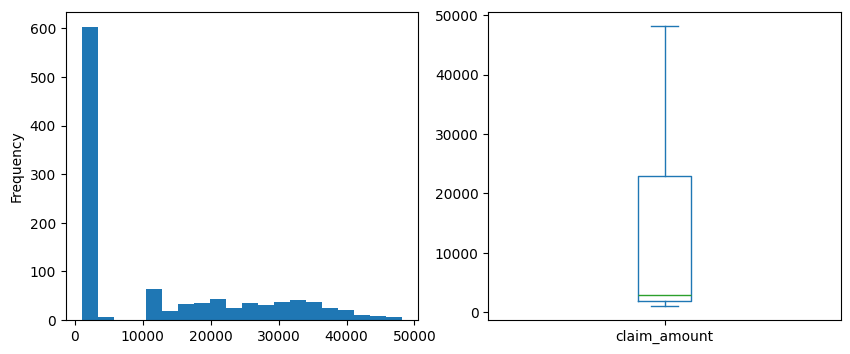

In [55]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_claim['claim_amount'].plot(kind='hist',bins=20,ax=ax[0])
data_claim['claim_amount'].plot(kind='box',ax=ax[1])

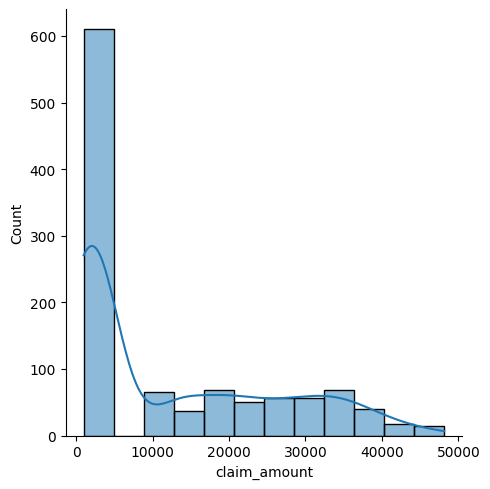

In [56]:
sns.displot(data=data_claim, x='claim_amount', kde=True, label='Jumlah Klaim Asuransi')

Dari perhitungan dan grafik yang diperoleh menunjukkan bahwa jumlah klaim asuransi mempunyai nilai minimum sebesar 1000.0 US Dollar, nilai maksimum sebesar 48150.5 US Dollar, dengan selisihnya yaitu 47150.5 US Dollar, rata-rata jumlah klaim yaitu sebesar 12467.68 US Dollar, mediannya 2852.0 US Dollar, dan jumlah klaim yang paling banyak muncul yaitu 12467.68 US Dollar. Tak hanya itu, hasil skewness bernilai 0.8 < 1  dan menunjukkan bahwa data tergolong moderately skewed dan merupakan right-skewed distrubution sedangkan kurtosis bernilai -0.67 < 3 menunjukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion. Dari box plot juga dapat dilihat bahwa tidak terdapat data yang outliers.

Jika dilihat selisih nilai asuransi yang mempunyai rentang yang luas menunjukkan adanya variasi besar dalam jumlah klaim, yang bisa disebabkan oleh perbedaan jenis klaim atau kebijakan yang diambil oleh pemegang polis. Median yang lebih rendah dari rata-rata menguatkan indikasi adanya distribusi yang tidak simetris, dengan beberapa klaim yang sangat besar yang mempengaruhi rata-rata secara signifikan. Mengingat variabilitas klaim yang tinggi, perusahaan asuransi mungkin perlu mengevaluasi kembali struktur premi mereka untuk memastikan bahwa mereka cukup mengkompensasi risiko yang lebih tinggi yang dihadapi.

## Bulan dengan rata-rata jumlah klaim asuransi tertinggi dan terendah

Untuk mengetahui rata-rata claim perbulan, kolom claim_date akan menjadi acuan.

In [130]:
# Ekstrak bulan dari kolom claim_date 
data_claim['month'] = data_claim['claim_date'].dt.month

Bulan dari cliam_date berhasil di ekstrak.

In [131]:
# Kelompokkan berdasarkan month dan hitung rata-rata claim_amount
monthly_avg_claim = data_claim.groupby('month')['claim_amount'].mean().reset_index()
monthly_avg_claim.columns = ['Month', 'Average Claim Amount']

print(monthly_avg_claim)

    Month  Average Claim Amount
0       1          12685.640663
1       2          12856.106874
2       3          11892.611774
3       4          12322.722502
4       5          11980.526355
5       6          13750.818153
6       7          13009.524834
7       8          10238.146563
8       9          12600.766843
9      10          11866.171729
10     11          13661.803699
11     12          14514.555862


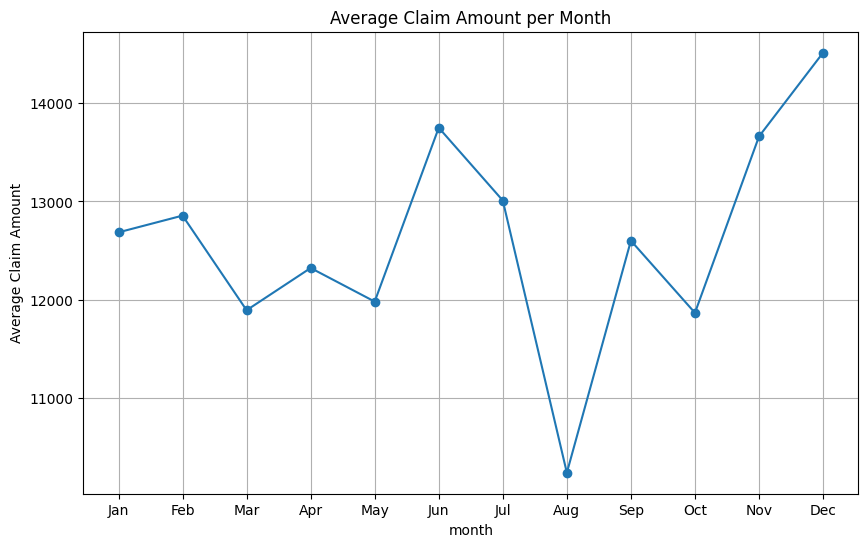

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_claim['Month'], monthly_avg_claim['Average Claim Amount'], marker='o')
plt.title('Average Claim Amount per Month')
plt.xlabel('month')
plt.ylabel('Average Claim Amount')
plt.xticks(monthly_avg_claim['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Dapat dilihat bahwa rata-rata jumlah klaim tertinggi ada di bulan desember yaitu sebesar 14514.55 US Dollar sedangkan rata-rata terendah ada di bulan Agustus sebesar 10238.15 US Dollar

## Variabel-variabel yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018

### Analisis Kolerasi

Untuk mengetahui variabel-variabel apa saja yang akan mempengaruhi jumlah klaim asuransi pada periode 2017-2018 maka dilakukan uji statistik inferensial dengan kolerasi pearson, spearman, atau kendall. Kolerasi tersebut dipilih karena claim amount merupakan variabel numerik yang mana akan diuji dengan variabel-variabel lainnya (bisa numerik atau kategori). Pengujian pearson atau spearman (perlu melihat distribusinya dulu) digunakan untuk variabel numerik sedangkan kendall digunakan untuk variabel kategori.

Dalam hal ini, bersumber dari https://info.populix.co/articles/koefisien-korelasi-adalah/ kriteria hasil kolerasi yaitu:

- 0 : Tidak ada korelasi antara dua variabel
- 0 – 0,25 : Korelasi sangat lemah
- 0,25 – 0,5 : Korelasi cukup
- 0,5 – 0,75 : Korelasi kuat
- 0,75 – 0,99 : Korelasi sangat kuat
- 1 : Korelasi hubungan sempurna positif
- -1 : Korelasi hubungan sempurna negatif

Untuk signifikasinnya (p-value) yaitu: 
- p < 0.05: Hubungan signifikan secara statistik (nyata)
- p ≥ 0.05: Hubungan tidak signifikan secara statistik (tidak nyata)

In [57]:
# Mengecek tipe data untuk mengetahui yang mana variabel kategori dan yang mana numerik
data_claim.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims             int64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
Age                             int64
AgeCategory                    object
Region                         object
dtype: object

Dilihat dari tipe data yang termasuk variabel kategori yaitu 'incident_cause', 'claim_area', 'police_report', 'claim_type', 'fraudulent', 'gender', 'State','Segment', 'AgeCategory', dan 'Region' sedangkan variabel numerik yaitu 'total_policy_claims', dan 'Age'. 

In [67]:
# Pengujian kendall pada variabel kategori 
columns_kendall = ['incident_cause', 'claim_area', 'police_report', 'claim_type', 'fraudulent', 'gender', 'State','Segment', 'AgeCategory', 'Region']

for i in columns_kendall:
  corr_tau, pval_k = stats.kendalltau(data_claim['claim_amount'], data_claim[i])
  prompt = "and they are dependent" if pval_k<0.05 else ""
  print(f"Colleration between {i} and claim_amount is:")
  print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k} {prompt}")
  print("---"*30)

Colleration between incident_cause and claim_amount is:
tau-correlation: 0.09, p-value: 7.256607266386232e-05 and they are dependent
------------------------------------------------------------------------------------------
Colleration between claim_area and claim_amount is:
tau-correlation: -0.03, p-value: 0.17569619529040903 
------------------------------------------------------------------------------------------
Colleration between police_report and claim_amount is:
tau-correlation: 0.28, p-value: 4.779924286077939e-33 and they are dependent
------------------------------------------------------------------------------------------
Colleration between claim_type and claim_amount is:
tau-correlation: -0.63, p-value: 1.5045887751860494e-153 and they are dependent
------------------------------------------------------------------------------------------
Colleration between fraudulent and claim_amount is:
tau-correlation: 0.03, p-value: 0.2175697226661628 
-----------------------------

Berdasarkan analisa kolerasi dengan kendall, kolerasi yang dihasilkan yaitu
- Variabel segmen dan agecategory memiliki kolerasi 0 sehingga dinyatakan tidak ada kolerasi dengan variabel claim_amount 
- Selain kedua variabel pada poin sebelumnya memiliki kolerasi di rentang 0.1 - 0.3 sehingga dinyatakan kolerasinya sangat lemah atau hampit tidak ada hubungan dengan claim_amount.
- Namun, dilihat dari p-value didapatkan bahwa dari 10 kolom yang merupakan katageri hanya terdapat 3 kolom yang nilai p-valuenya < 0.05 yaitu incident_cause, police_report, dan claim_type. Dapat diartikan bahwa kolerasi antara jumlah klaim dengan penyebab terjadinya kecelakaan, ada atau tidaknya pelaporan kepada pihak polisi atau tidak, dan tipe klaim yang diajukan adalah nyata.

Sebelum mengecek kolerasi untuk variabel numerik, maka perlu melihat distribusi datanya dahulu apakah normal atau tidak. Jika normal, uji yang digunakan yaitu pearson dan jika tidak yang digunakan yaitu spearman.

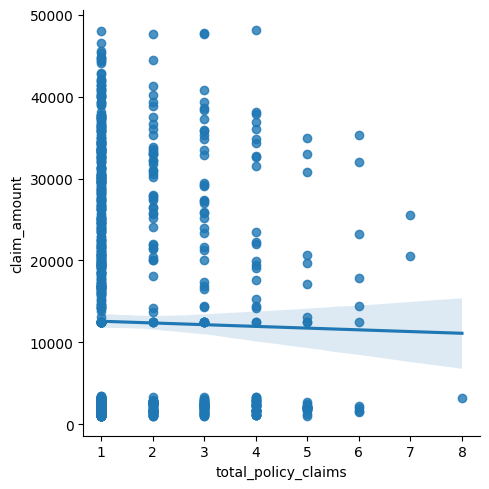

In [71]:
# Plot Distribusi total_policy_claims dengan claim_amount
sns.lmplot(data=data_claim, x='total_policy_claims', y='claim_amount')

Dapat dilihat pada plot yang dihasilkan menunjukkan bahwa data tergolong tidak linear dan distribusi yang dihasilkan tidak seimbang sehingga analisa kolerasi spearman adalah pilihan yang tepat. 

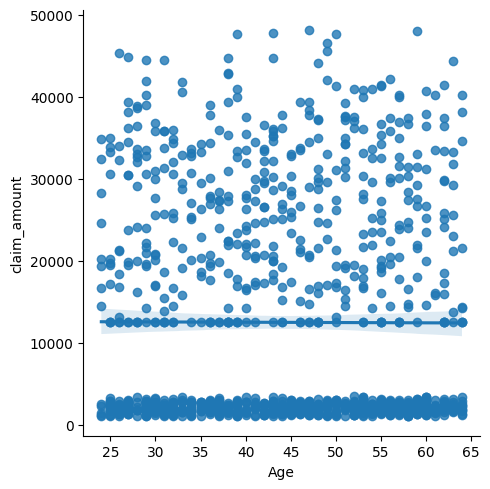

In [73]:
# Plot distribusi untuk age dan claim_amount
sns.lmplot(data=data_claim, x='Age', y='claim_amount')

Dapat dilihat pada plot yang dihasilkan menunjukkan bahwa data tergolong tidak linear dan distribusi yang dihasilkan tidak seimbang sehingga analisa kolerasi spearman adalah pilihan yang tepat. 

In [74]:
# Pengujian spearman pada variabel numerik
columns_spearman = ['total_policy_claims', 'Age']

for i in columns_spearman:
  corr_rho, pval_s = stats.pearsonr(data_claim['claim_amount'], data_claim[i])
  prompt = "and they are dependent" if pval_s<0.05 else ""
  print(f"Colleration between {i} and claim_amount is:")
  print(f"tau-correlation: {corr_rho:.2f}, p-value: {pval_s} {prompt}")
  print("---"*30)

Colleration between total_policy_claims and claim_amount is:
tau-correlation: -0.02, p-value: 0.5547051246395778 
------------------------------------------------------------------------------------------
Colleration between Age and claim_amount is:
tau-correlation: -0.00, p-value: 0.9149029492317792 
------------------------------------------------------------------------------------------


Berdasarkan analisa kolerasi dengan pearson, didapatkan bahwa dari kedua kolom (total_policy_claims dan age) tidak mempunyai kolerasi dengan kolom claim_amount. Maksudnya disini adalah jumlah klaim asuransi tidak dipengaruh oleh total polis yang diklaim dan usia dari pemilik asuransi.

Berdasarkan analisa kolerasi dengan spearman, kolerasi yang dihasilkan yaitu:
- Variabel total_policy_claims memiliki kolerasi 0 sehingga dinyatakan tidak ada kolerasi dengan variabel claim_amount 
- Variabel Age memiliki kolerasi di rentang 0.1 - 0.3 sehingga dinyatakan kolerasinya sangat lemah atau hampir tidak ada hubungan dengan claim_amount.
- Kedua variabel tersebut memiliki nilai p-value >= 0.05 sehingga dinyatakan bahwa tidak ada hubungan secara signifikan atau nyata dengan claim_amount. 

Namun, perlu dilakukan pengecekan atau eksplorasi pada setiap variabel yang berpengaruh. Untuk mengeksplorasi tersebut, diperlukan perhitungan tingkat retensi terlebih dahulu dengan mengukur rata-rata claim_amount. Rata-rata tersebut merupakan tingkat retensi yang selanjutnya dilakukan uji hipotesis.

### Uji Hipotesis Variabel yang Mempunyai Kolerasi

#### Variabel Penyebab Kecelakaan (incident_cause)

Uji hipotesis yang dilakukan yaitu uji ANOVA yang mana digunakan untuk membandingkan rata-rata dari tiga atau lebih kelompok. 

In [108]:
# Mengecek unique value 
data_claim['incident_cause'].unique()

array(['Driver error', 'Crime', 'Other driver error', 'Natural causes',
       'Other causes'], dtype=object)

Dilihat dari unique value, incident_cause terdiri dari 5 kelompok > 3 kelompok sehingga uji anova cocok untuk mengetahui hubungan dari variabel tersebut dengan claim_amount. Hal tersebut dikarenakan uji ANOVA  digunakan untuk membandingkan rata-rata dari tiga atau lebih kelompok. 

Hipotesa dari pengujian ini yaitu: 

**H0**: Tidak ada perbedaan signifikan di antara rata-rata kelompok 

**H1**: Setidaknya satu rata-rata kelompok berbeda secara signifikan dari yang lain

In [77]:
# Dataframe baru berdasarkan Incident Cause
Crime = data_claim['claim_amount'][data_claim['incident_cause']=='Crime']
Drivererror = data_claim['claim_amount'][data_claim['incident_cause']=='Driver error']
Otherdrivererror = data_claim['claim_amount'][data_claim['incident_cause']=='Other driver error']
Naturalcauses = data_claim['claim_amount'][data_claim['incident_cause']=='Natural causes']
Othercauses = data_claim['claim_amount'][data_claim['incident_cause']=='Other causes']

In [105]:
# Rata-rata pada masing-masing kelompok
print(f'Average claim amount of Crime Group: \t\t\t {Crime.mean():.2f} US Dollar')
print(f'Average claim amount of Driver error Group: \t\t {Drivererror.mean():.2f} US Dollar')
print(f'Average claim amount of Other driver error Group: \t {Otherdrivererror.mean():.2f} US Dollar')
print(f'Average claim amount of Natural causes Group: \t\t {Naturalcauses.mean():.2f} US Dollar')
print(f'Average claim amount of Other causes Group: \t\t {Othercauses.mean():.2f} US Dollar')

Average claim amount of Crime Group: 			 7029.99 US Dollar
Average claim amount of Driver error Group: 		 13785.07 US Dollar
Average claim amount of Other driver error Group: 	 14528.13 US Dollar
Average claim amount of Natural causes Group: 		 7452.54 US Dollar
Average claim amount of Other causes Group: 		 14823.61 US Dollar


In [60]:
# Rata-rata claim amount berdasarkan incident cause 
mean_by_incident = data_claim.groupby('incident_cause')[['claim_amount']].mean()

# Panggil variabel 
mean_by_incident

,claim_amount
incident_cause,
Crime,7029.985249
Driver error,13785.068590
Natural causes,7452.542009
Other causes,14823.609219
Other driver error,14528.128731


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\4289709902.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1,1))


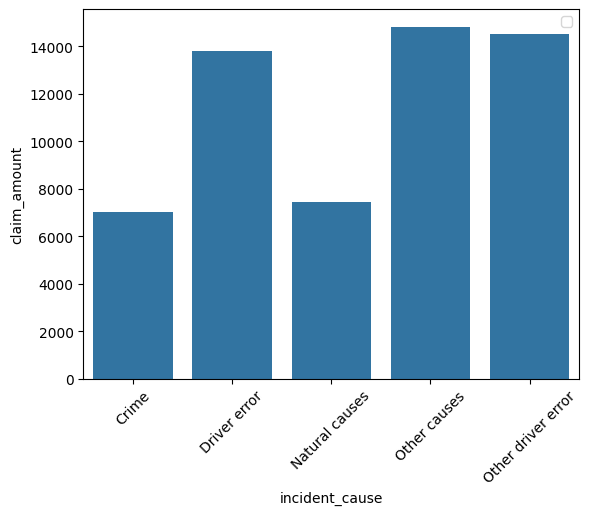

In [61]:
sns.barplot(data=mean_by_incident, x='incident_cause', y='claim_amount', orient='v')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

Dapat dilihat bahwa rata-rata pada penyebab kecelakaan untuk crime dan natural causes mempunyai nilai yang hampir sama sedangkan untuk driver error, other causes, dan other driver juga mempunyai nilai yang hampir sama.

Artinya informasi ini dapat digunakan oleh perusahaan asuransi untuk menetapkan premi yang lebih akurat berdasarkan risiko yang teridentifikasi. Misalnya, dilakukan penyesuain berdasarkan 2 kategori yang mana kategori 1 diakibatkan "crime" dan "natural causes" dan kategori 2 disebabkan oleh "driver error," "other causes," dan "other driver" yang nantinya premi dapat disesuikan berdasarkan kedua kategori tersebut.

In [107]:
# Uji ANOVA
res = stats.f_oneway(Crime, Drivererror, Otherdrivererror, Naturalcauses, Othercauses)
print('P-value:',res.pvalue)

P-value: 7.04735932254346e-13


Uji ANOVA menunjukkan p-value yang dihasilkan < 0,05 sehingga dapat disimpulkan bahwa **H0 berhasil ditolak** dan **H1 diterima** artinya setidaknya satu rata-rata kelompok pada penyebab kecelakaan berbeda secara signifikan dari yang lain yang mana mempengaruhi besarnya klaim yang diajukan. 

#### Variabel Ada atau tidaknya laporan kepada pihak kepolisian (police_report)

In [109]:
# Mengecek unique value 
data_claim['police_report'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

Dilihat dari unique value, police report terdiri dari 3 kelompok sehingga uji anova cocok untuk mengetahui hubungan dari variabel tersebut dengan claim_amount. Hal tersebut dikarenakan, uji ANOVA digunakan untuk membandingkan rata-rata dari tiga atau lebih kelompok. 

Hipotesa dari pengujian ini yaitu: 

**H0**: Tidak ada perbedaan signifikan di antara rata-rata kelompok 

**H1**: Setidaknya satu rata-rata kelompok berbeda secara signifikan dari yang lain

In [111]:
# Dataframe baru berdasarkan police report
No = data_claim['claim_amount'][data_claim['police_report']=='No']
Unknown = data_claim['claim_amount'][data_claim['police_report']=='Unknown']
Yes = data_claim['claim_amount'][data_claim['police_report']=='Yes']


In [116]:
# Rata-rata pada masing-masing kelompok
print(f'Average claim amount of No: \t {No.mean():.2f} US Dollar')
print(f'Average claim amount of Unknown: {Unknown.mean():.2f} US Dollar')
print(f'Average claim amount of Yes: \t  {Yes.mean():.2f} US Dollar')

Average claim amount of No: 	 8568.85 US Dollar
Average claim amount of Unknown: 14538.26 US Dollar
Average claim amount of Yes: 	  23231.27 US Dollar


In [117]:
# Rata-rata claim amount berdasarkan police report
mean_by_police = data_claim.groupby('police_report')[['claim_amount']].mean()

# Memanggil variabel 
mean_by_police

,claim_amount
police_report,
No,8568.848308
Unknown,14538.263182
Yes,23231.271359


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_764\1352334876.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1,1))


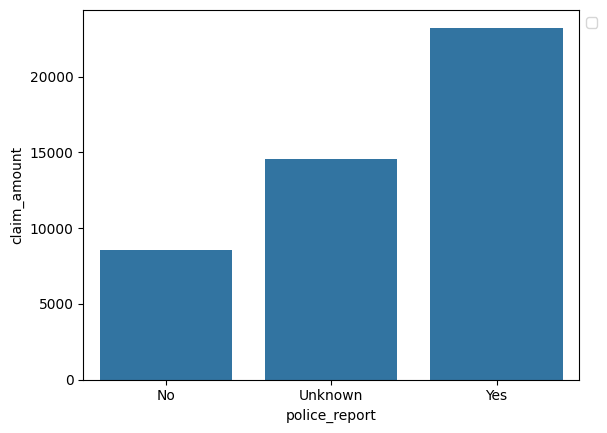

In [267]:
sns.barplot(data=mean_by_police, x='police_report', y='claim_amount', orient='v')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Dapat dilihat bahwa besarnya jumlah klaim asuransi rata-rata tertinggi ada di kategori "Yes" atau terdapat adanya laporan kepada pihak kepolisian. Artinya, kerusakan yang diakibatkan dari kecelakaan yaitu besar dan melibatkan kepolisian sehingga jumlah asuransi yang di klaim juga besar.

In [118]:
# Uji ANOVA
res = stats.f_oneway(No, Unknown, Yes)
print('P-value:',res.pvalue)

P-value: 1.550348071260915e-40


Uji ANOVA menunjukkan p-value yang dihasilkan < 0,05 sehingga dapat disimpulkan bahwa **H0 berhadil ditolak** dan **H1 diterima** artinya setidaknya satu rata-rata kelompok pada ada atau tidaknya laporan kepada pihak kepolisian berbeda secara signifikan dari yang lain yang mana mempengaruhi besarnya klaim yang diajukan. 

#### Variabel tipe klaim (claim_type)

In [120]:
# Mengecek unique value 
data_claim['claim_type'].unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

Dilihat dari unique value, tipe klaim terdiri dari 3 kelompok sehingga uji anova cocok untuk mengetahui hubungan dari variabel tersebut dengan claim_amount. Hal tersebut dikarenakan, uji ANOVA digunakan untuk membandingkan rata-rata dari tiga atau lebih kelompok. 

In [121]:
# Dataframe baru berdasarkan police report
Material_only = data_claim['claim_amount'][data_claim['claim_type']=='Material only']
Injury_only = data_claim['claim_amount'][data_claim['claim_type']=='Injury only']
Material_and_injury = data_claim['claim_amount'][data_claim['claim_type']=='Material and injury']

In [125]:
# Rata-rata pada masing-masing kelompok
print(f'Average claim amount of Material only: \t\t {Material_only.mean():.2f} US Dollar')
print(f'Average claim amount of Injury only: \t\t {Injury_only.mean():.2f} US Dollar')
print(f'Average claim amount of Material and injury: \t {Material_and_injury.mean():.2f} US Dollar')

Average claim amount of Material only: 		 2748.81 US Dollar
Average claim amount of Injury only: 		 25959.40 US Dollar
Average claim amount of Material and injury: 	 28145.06 US Dollar


In [268]:
# Rata-rata claim amount berdasarkan claim tipe
mean_by_claimtype = data_claim.groupby('claim_type')[['claim_amount']].mean()

# Memanggil data 
mean_by_claimtype

,claim_amount
claim_type,
Injury only,25959.397411
Material and injury,28145.059051
Material only,2748.809799


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_764\462908248.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1,1))


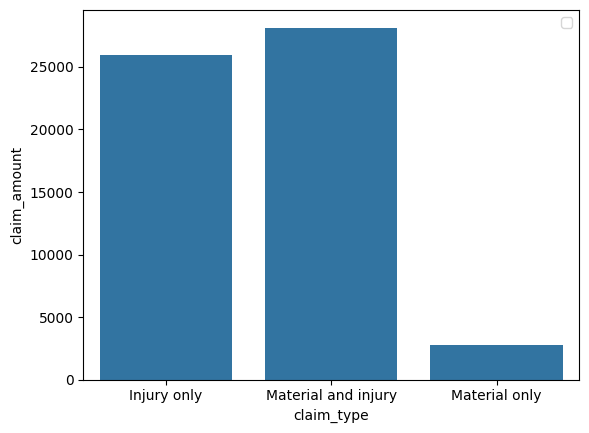

In [269]:
sns.barplot(data=mean_by_claimtype, x='claim_type', y='claim_amount', orient='v')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Dapat dilihat bahwa besarnya jumlah klaim asuransi pada kategori 'injury only ' dan 'material and injury' tidak berbeda secara signifikan sedangkan 'material only' justru memiliki selisih yang jauh dari kedua kategori tersebut. Artinya kedua kategori yaitu 'injury only' dan 'material and injury' kerusakannya cukup parah sehingga klaim yang diajukan lebih tinggi harganya dibanding 'material only'.

In [126]:
# Uji ANOVA
res = stats.f_oneway(Injury_only, Material_only, Material_and_injury)
print('P-value:',res.pvalue)

P-value: 0.0


Uji ANOVA menunjukkan p-value yang dihasilkan < 0,05 sehingga dapat disimpulkan bahwa **H0 berhadil ditolak** dan **H1 diterima** artinya setidaknya satu rata-rata kelompok pada tipe klaim berbeda secara signifikan dari yang lain yang mana mempengaruhi besarnya klaim yang diajukan. 

## Pelanggan yang paling sering melakukan klaim asuransi

In [152]:
# Mengecek panjang data kembali
len(data_claim)

1085

Terdapat 1085 data pelanggan beserta dengan variabel-variabelnya.

### Berdasarkan jenis kelamin dan kategori umur

#### Banyaknya klaim yang diajukan

In [153]:
# Ingin tau berdasarkan jenis kelamin (gender) dan kategori umur (age)
gender_age_counts = pd.crosstab(data_claim['gender'], data_claim['AgeCategory'])
print(gender_age_counts)

AgeCategory  Adult  Senior  Youth
gender                           
Female         511       8     13
Male           516      11     26


Dapat dilihat bahwa, berdasarkan jenis kelamin klaim asuransi sebagian besar dilakukan oleh laki-laki dibandingkan perempuan. Jika dijumlahkan laki-laki sebesar 553 sedangkan perempuan sebesar 532. 

#### Rata-rata jumlah klaim yang diajukan

In [154]:
# Ingin tau berdasarkan rata-ratanya 
gender_age = data_claim.groupby(['gender','AgeCategory'])['claim_amount'].mean().reset_index()
gender_age

,gender,AgeCategory,claim_amount
0,Female,Adult,12089.867350
1,Female,Senior,10994.505515
2,Female,Youth,9385.038462
3,Male,Adult,12888.720902
4,Male,Senior,12122.772727
5,Male,Youth,13677.694005


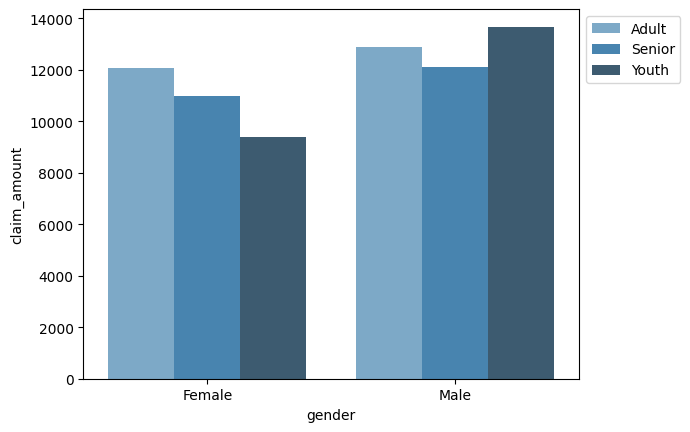

In [155]:
sns.barplot(data=gender_age, x='gender', y='claim_amount', orient='v', hue='AgeCategory', palette='Blues_d')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Rata-rata besarnya klaim asuransi yang diajukan lebih banyak yaitu pada laki-laki remaja.

### Berdasarkan Kota (state)

#### Banyaknya klaim yang diajukan

In [156]:
# Dilihat dari value masing-masing kota 
data_claim['State'].value_counts()

State
New York          31
Arkansas          29
Delaware          29
Alabama           28
Maine             28
Idaho             27
North Dakota      27
Tennessee         26
Rhode Island      26
Iowa              26
Colorado          26
South Dakota      25
Connecticut       25
Massachusetts     25
Nevada            25
Florida           25
Wisconsin         24
North Carolina    24
Illinois          23
Missouri          23
Ohio              22
Vermont           22
Indiana           22
Texas             22
Maryland          21
Oklahoma          21
Nebraska          21
Montana           20
Louisiana         20
Pennsylvania      20
South Carolina    20
West Virginia     20
Alaska            19
Washington        19
New Mexico        19
Georgia           19
Kansas            19
New Hampshire     18
Virginia          18
Michigan          18
Utah              18
Minnesota         17
Mississippi       17
New Jersey        17
Wyoming           17
California        17
Hawaii            17
Arizona

Dapat dilihat bahwa kota paling banyak melakukan klaim yaitu New York sebesar 31 klaim dan paling sedikit yaitu Kentucky dan Oregon sebesar 14 klaim.

#### Rata-rata jumlah klaim yang diajukan

In [172]:
# Rata-rata claim amount berdasarkan incident cause 
mean_by_state = data_claim.groupby('State')[['claim_amount']].mean()

# Panggil variabel 
mean_by_state.sort_values(by='claim_amount', ascending=False)

,claim_amount
State,
Montana,18080.009069
Arizona,17792.324183
Nevada,16888.394510
Maine,16856.220763
New Jersey,16494.588235
West Virginia,16387.525000
North Carolina,15927.598448
Alaska,15505.703302
Idaho,15112.013435


Dapat dilihat bahwa kota yang jumlah klaim asuransinya paling banyak yaitu Montana sebesar 18080 US Dollar dan paling sedikit yaitu Mississippi sebesar 6361 US Dollar.

### Berdasarkan wilayah (Region)

#### Banyaknya klaim yang diajukan

In [173]:
# Ingin tau berdasarkan wilayah (region)
data_claim['Region'].value_counts()

Region
South        353
Midwest      267
West         253
Northeast    212
Name: count, dtype: int64

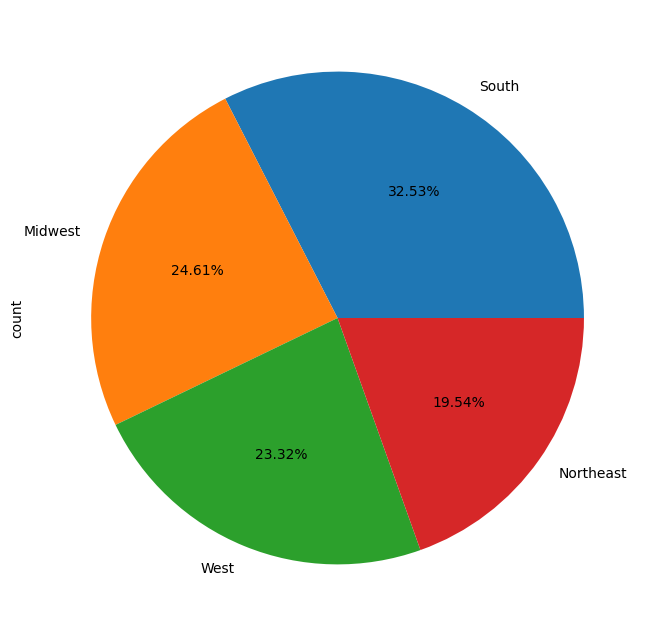

In [175]:
fig,ax1 = plt.subplots(figsize=(8,8))

data_claim['Region'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Dapat dilihat bahwa, klaim asuransi sebagian besar dilakukan oleh diwilayah South dengan persentase 32.53% diikuti oleh Midwest (24.61%), West (23.32%) dan Northeast (19.54%)

#### Rata-rata jumlah klaim yang diajukan

In [143]:
# Rata-rata claim amount berdasarkan incident cause 
mean_by_region = data_claim.groupby('Region')[['claim_amount']].mean()

# Panggil variabel 
mean_by_region

,claim_amount
Region,
Midwest,12460.765550
Northeast,12807.602039
South,11190.221963
West,13972.529257


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12004\3720158227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='claim_amount', y='Region', data=mean_by_region, palette='Blues_d')


Text(0, 0.5, 'Region')

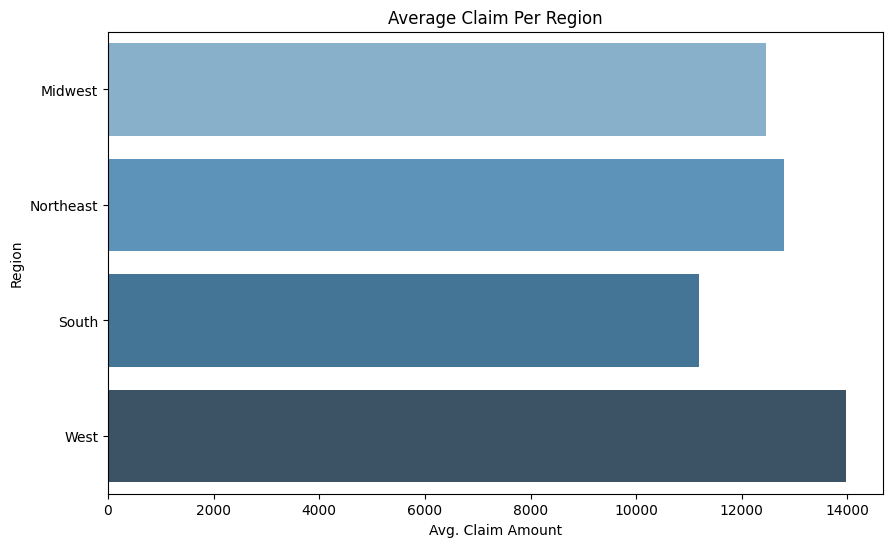

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x='claim_amount', y='Region', data=mean_by_region, palette='Blues_d')
plt.title('Average Claim Per Region')
plt.xlabel('Avg. Claim Amount')
plt.ylabel('Region')

Dapat dilihat bahwa, rata-rata jumlah klaim asuransi tertinggi pada wilayah West sebesar 13972.53 US Dollar.

### Berdasarkan ada atau tidaknya tindak kecurangan 

In [176]:
# Ingin tau berdasarkan jenis kelamin (gender) dan adanya tindakan kecurangan pada data (fraudulent)
gender_fraud_counts = pd.crosstab(data_claim['gender'], data_claim['fraudulent'])
print(gender_fraud_counts)

fraudulent   No  Yes
gender              
Female      406  126
Male        432  121


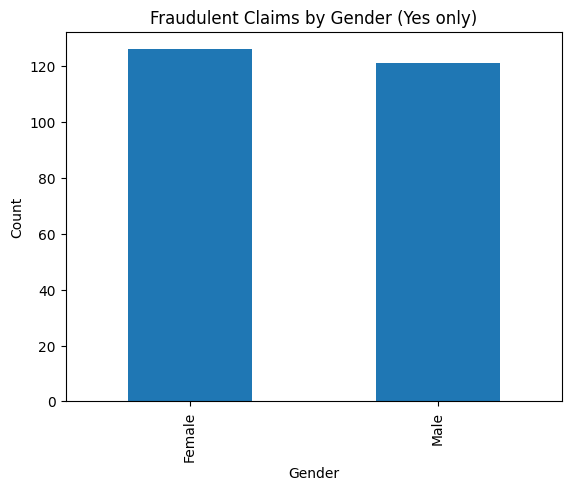

In [181]:
#Me-slicing untuk Yes saja 
yes_counts = gender_fraud_counts['Yes']

# Cetak diagramnya 
yes_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Fraudulent Claims by Gender (Yes only)')
plt.show()

Dapat dilihat bahwa, berdasarkan jenis kelamin tindakan kecurangan pada data klaim tidak berbeda signifikan antara laki-laki dengan perempuan.

## Perbedaan jumlah klaim asuransi pada tipe pelanggan dilihat dari jenis kelaminnya

Saya ingin mengetahui jika berdasarkan jenis kelamin yaitu laki-laki dan perempuan apakah jumlah klaim asuransinya berbeda. Dalam hal ini saya melakukan uji hipotesis two-sample indepent test. Hal tersebut dikarenakan  uji ini cocok untuk membandingkan dua kelompok yang berbeda, seperti jumlah klaim asuransi di jenis kelamin laki-laki dan perempuan serta dapat membantu menentukan apakah perbedaan rata-rata antara dua kelompok adalah signifikan secara statistik atau hanya terjadi secara kebetulan.

Dalam hal ini maka terdapat hipotesa yaitu:

**H0**: Jumlah klaim asuransi untuk jenis kelamin laki-laki tidak berbeda signifikan dengan perempuan 

**H1**: Jumlah klaim asuransi untuk jenis kelamin laki-laki berbeda signifikan dengan perempuan 

In [154]:
# Membuat rangkuman tabel berdasarkan gender
male = data_claim[data_claim['gender']=='Male'][['Segment', 'claim_amount']].groupby(['Segment']).mean()
female = data_claim[data_claim['gender']=='Female'][['Segment', 'claim_amount']].groupby(['Segment']).mean()

In [155]:
# Memanggil tabel male
male

,claim_amount
Segment,
Gold,13287.319289
Platinum,12561.546770
Silver,12823.080440


Tidak terdapat perbedaan yang signifikan pada jumlah klaim oleh pelanggan laki-laki pada setiap segment.

In [156]:
# Memanggil tabel female
female

,claim_amount
Segment,
Gold,12279.756583
Platinum,12223.885410
Silver,11471.878662


Tidak terdapat perbedaan yang signifikan pada jumlah klaim oleh pelanggan perempuan pada setiap segment.

In [157]:
# Uji Hipotesis Two-Sample Independent Test
t_stat, p_val = stats.ttest_ind(male['claim_amount'], female['claim_amount'])
print('T-Statistic:',t_stat)
print('P-value:',p_val/2)

T-Statistic: 2.6751324080087446
P-value: 0.027754388294701653


Uji hipotesis yang digunakan yaitu two-sample indepent test yang mana membandingkan harga produk berdasarkan wilayah. P-Value yang dihasilkan yaitu sebesar 0.02 < 0.05 sehingga dapat disimpulkan bahwa **H0 berhasil ditolak** dan **Terima H1** yang berarti jumlah klaim asuransi untuk jenis kelamin laki-laki berbeda signifikan dengan perempuan.

# Conclusion

## Rekapitulasi 

### File Data

1. Data yang diperoleh disimpan dalam format csv berjudul `claims.csv` dan `cust.csv`
2. Data hasil cleaning dan untuk di analisa yaitu `claims_insurance.csv`

### Hasil Analisa

#### Nilai minimum, maximum, rata-rata, median, modus dari jumlah klaim yang diajukan

Dari perhitungan dan grafik yang diperoleh menunjukkan bahwa jumlah klaim asuransi mempunyai nilai minimum sebesar 1000.0 US Dollar, nilai maksimum sebesar 48150.5 US Dollar, dengan selisihnya yaitu 47150.5 US Dollar, rata-rata jumlah klaim yaitu sebesar 12467.68 US Dollar, mediannya 2852.0 US Dollar, dan jumlah klaim yang paling banyak muncul yaitu 12467.68 US Dollar. 

#### Bulan dengan rata-rata klaim asuransi tertinggi dan terendah

Rata-rata jumlah klaim tertinggi ada di bulan desember yaitu sebesar 14514.55 US Dollar sedangkan rata-rata terendah ada di bulan Agustus sebesar 10238.15 US Dollar.

#### Variabel-variabel yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018

Variabel-variabel yang mempengaruhi jumlah klaim asuransi pada tahun 2017-2018 yaitu penyebab terjadinya kecelakaan (incident_cause), ada atau tidaknya laporan kepada pihak kepolisian (police_report) dan tipe klaim (claim_type) hal tersebut dibuktikan dengan hasil uji kolerasi dengan nilai p-value yang dhasilkan < 0,05 dan dilakukan pembuktian selanjutnya menggunakan uji ANOVA dengan hasil ketiganya yaitu **H0 berhasil ditolak** dan **H1 diterima** artinya setidaknya satu rata-rata kelompok pada kolom tersebut berbeda secara signifikan dari yang lain yang mana mempengaruhi besarnya klaim yang diajukan. 

#### Pelanggan yang paling sering melakukan klaim asuransi

Berdasarkan kategori berikut, diperoleh:
- Jenis kelamin dan kategori umur: klaim asuransi sebagian besar dilakukan oleh laki-laki dibandingkan perempuan. Mayoritas klaim tersebut dilakukan oleh orang dewasa (adult) yang rentang usianya yaitu 26 s/d 63 tahun. Namun, rata-rata besarnya klaim asuransi yang diajukan lebih banyak yaitu pada laki-laki remaja 15 s/d 25 tahun.
- Kota: kota paling banyak melakukan klaim yaitu New York sebesar 31 klaim sedangkan kota yang jumlah klaim asuransinya tertinggi yaitu Montana sebesar 18080 US Dollar.
- Wilayah: klaim asuransi sebagian besar dilakukan oleh diwilayah South dengan persentase 32.53% sedangkan rata-rata jumlah klaim asuransi tertinggi pada wilayah West sebesar 13972.53 US Dollar.
- Ada atau tidaknya tindakan kecurangan: kecurangan pada data klaim tidak berbeda signifikan antara laki-laki dengan perempuan.

#### Perbedaan jumlah klaim asuransi pada tipe pelanggan dilihat dari jenis kelaminnya

P-Value yang dihasilkan yaitu sebesar 0.02 < 0.05 sehingga dapat disimpulkan bahwa **H0 berhasil ditolak** dan **Terima H1** yang berarti jumlah klaim asuransi untuk jenis kelamin laki-laki berbeda secara signifikan dengan perempuan.

## Insight 

#### Nilai minimum, maximum, rata-rata, median, modus dari jumlah klaim yang diajukan

Jika dilihat selisih nilai asuransi yang mempunyai rentang yang luas menunjukkan adanya variasi besar dalam jumlah klaim, yang bisa disebabkan oleh perbedaan jenis klaim atau kebijakan yang diambil oleh pemegang polis. Median yang lebih rendah dari rata-rata menguatkan indikasi adanya distribusi yang tidak simetris, dengan beberapa klaim yang sangat besar yang mempengaruhi rata-rata secara signifikan. Mengingat variabilitas klaim yang tinggi, perusahaan asuransi mungkin perlu mengevaluasi kembali struktur premi mereka untuk memastikan bahwa mereka cukup mengkompensasi risiko yang lebih tinggi yang dihadapi.

#### Bulan dengan rata-rata klaim asuransi tertinggi dan terendah

Kemungkinan jumlah klaim meningkat di bulan Desember berkaitan dengan musim liburan atau cuaca ekstrem yang menyebabkan lebih banyak kecelakaan atau kerusakan. Sedangkan penurunan di bulan Agustus mungkin terkait dengan aktivitas atau perilaku tertentu. Hal ini membantu perusahaan untuk mempersiapkan dana yang cukup untuk bulan-bulan dengan klaim tinggi.

#### Variabel-variabel yang mempengaruhi jumlah klaim asuransi pada periode 2017-2018

- Hasil analisa pada variabel penyebab insiden (incident_cause) dapat diartikan bawah dapat dilakukan penyesuaian berdasarkan 2 kategori yang mana kategori 1 diakibatkan "crime" dan "natural causes" dan kategori 2 disebabkan oleh "driver error," "other causes," dan "other driver" yang nantinya besarnya persentase yang akan di cover pihak asuransi dapat disesuaikan berdasarkan kedua kategori tersebut dengan kriteria yang sesuai.
- Hasil analisa pada variabel ada atau tidaknya laporan kepada pihak kepolisian (police_report) dapat diartikan kerusakan yang diakibatkan dari kecelakaan yaitu besar dan melibatkan kepolisian sehingga jumlah asuransi yang di klaim juga besar.
- Hasil analisa pada variabel tipe klaim (claim_type) dapat diartikan bahwa kedua kategori yaitu 'injury only' dan 'material and injury' kerusakannya cukup parah sehingga klaim yang diajukan lebih tinggi harganya dibanding 'material only'.


#### Pelanggan yang paling sering melakukan klaim asuransi

 - Hasil analisa pada tabel kategori umur (agecategory) dapat diartikan bahwa laki-laki dewasa cenderung lebih sering mengajukan klaim, kemungkinan karena mereka lebih sering mengemudi dibandingkan kelompok usia lainnya.Lainnya dengan laki-laki remaja yang mana besarnya klaim lebih tinggi menunjukkan bahwa ketika remaja laki-laki terlibat dalam kecelakaan, kecelakaan tersebut cenderung lebih serius yang menyebabkan klaim dengan nilai yang lebih tinggi. Sehingga perusahaan asuransi dapat lebih menawarkan produk asuransinya kepada laki-laki dengan premi yang lebih tinggi khususnya pada usia remaja.  
 - Hasil analisa pada tabel kota (state) menunjukkan bahwa perlu dilakukan peningkatan premi pada Kota New York dan Montanna. 
- Hasil analisa pada tabel wilayah (region) menunjukkan bahwa perlu dilakukan peningkatan premi pada Wilayah East dan West. 
- Hasil analisa pada tabel adanya tindakan kecurangan dari pemalsuan data (fraudulent) menunjukkan bahwa perusahaan asuransi mungkin perlu mengembangkan mekanisme pengawasan dan verifikasi yang lebih ketat untuk mendeteksi pemalsuan data tanpa memicu diskriminasi berbasis gender.

#### Perbedaan jumlah klaim asuransi pada tipe pelanggan dilihat dari jenis kelaminnya

Hasil hipotesis menunjukkan bahwa perusahaan bisa lebih menawarkan asuransi kepada perempuan karena klaim yang akan diajukan lebih sedikit dibanding laki-laki.

## Summary 

Sebagai data analyst yang telah mengidentifkasi faktor-faktor yang mempengaruhi jumlah klaim asuransi yang dilakukan oleh pelanggan selama periode 2017-2018 guna menentukan strategi perusahaan yang optimal sehingga akan terjadi peningkatan sebesar 15% dalam penjualannya dan tentunya meningkatkan profit perusahaan, terdapat beberapa poin yang direkomendasikan: 
- Perusahaan dapat mempersiapkan dana yang cukup untuk bulan dengan klaim tinggi yaitu desember. 
- Penawaran asuransi lebih ditargetkan kepada perempuan.
- Premi bisa ditingkatkan pada pelanggan laki-laki khususnya usia remaja sebesar 10%, pelanggan yang berada di Kota New York dan Montanna sebesar 5%, dan pelanggan yang berada di wilayah South dan East sebesar 5%. 
- Penawaran asuransi harus mengoptimalkan penilaian risiko berdasarkan penyebab insiden, meningkatkan efisiensi klaim dengan teknologi, menawarkan produk dan perlindungan yang sesuai dengan kebutuhan pelanggan, serta meningkatkan layanan dan pengalaman pelanggan.
- Perusahaan asuransi mungkin perlu mengembangkan mekanisme pengawasan dan verifikasi yang lebih ketat untuk mendeteksi pemalsuan data tanpa memicu diskriminasi berbasis gender.